# 

# Cloud configuration

In this notebook we will download the *hymenoptera* dataset and upload it to an AWS S3 bucket.

1. Imports and settings  
2. Create the bucket if it doesn't exist  
3. Download the data  
4. Data validation  
5. Upload to S3  

## Imports and settings

In [ ]:
import sagemaker
import boto3
import os
import urllib.request
import zipfile

boto_session = boto3.Session(profile_name='pessoal', region_name='us-east-1')
bucket_name = 'sagemaker-portfolio-cv-aws' 
sess = sagemaker.Session(boto_session=boto_session, default_bucket=bucket_name)
region = sess.boto_region_name

print(f"Region: {region}")
print(f"Target Bucket: {bucket_name}")

Região: us-east-1
Bucket alvo: sagemaker-portfolio-cv-aws


In [23]:
import sys
import os

BASE_DIR = os.path.abspath(os.path.join(os.getcwd(), ".."))
if BASE_DIR not in sys.path:
    sys.path.append(BASE_DIR)

##  Create the bucket if it doesn't exist 

In [24]:
from utils.bucket import create_bucket_if_not_exists

s3_client = boto_session.client('s3', region_name=region)
create_bucket_if_not_exists(s3_client, bucket_name, region)

✅ Bucket 'sagemaker-portfolio-cv-aws' criado/verificado com sucesso.


## Download and unzip file

In [25]:
# Garantir que o diretório local para os dados existe
local_data_dir = '../../data/raw/'
os.makedirs(local_data_dir, exist_ok=True)

In [ ]:
# URL dos dados pytorch
data_url = "https://download.pytorch.org/tutorial/hymenoptera_data.zip"
zip_path = os.path.join(local_data_dir, "hymenoptera_data.zip")

if not os.path.exists(zip_path):
    print("Downloading data...")
    urllib.request.urlretrieve(data_url, zip_path)
    print("Download completed.")
else:
    print("Zip file algready exists. Skipping download.")

Baixando os dados...
Download concluído.


In [ ]:
# Extrair os dados
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(local_data_dir)
print("Data extracted.")

Dados extraídos com sucesso.


In [ ]:
# apagar o arquivo zip para economizar espaço
os.remove(zip_path)
print("Zip file has been removed.")

Arquivo zip removido.


## Data Validation

In [ ]:
base_path = os.path.join(local_data_dir, 'hymenoptera_data')

phases = ['train', 'val']
classes = ['ants', 'bees']

print("Validation of the extracted data:")
for phase in phases:
    for cls in classes:
        dir_path = os.path.join(base_path, phase, cls)
        num_files = len(os.listdir(dir_path))
        print(f"{phase}/{cls}: {num_files} imagens")


Validação dos dados extraídos:
train/ants: 124 imagens
train/bees: 121 imagens
val/ants: 70 imagens
val/bees: 83 imagens


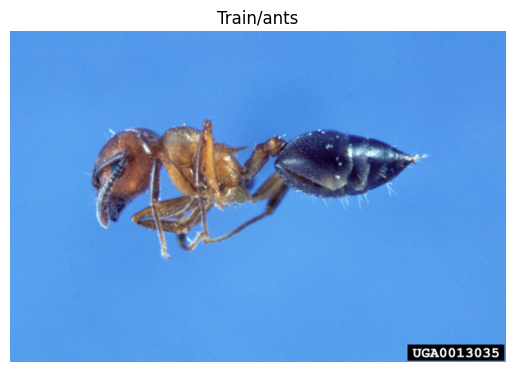

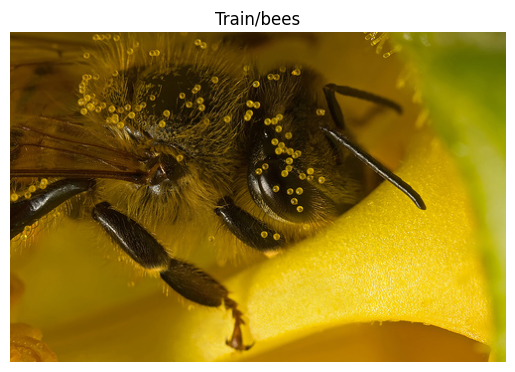

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# show some data samples
for cls in classes:
    img_path = os.path.join(base_path, 'train', cls, os.listdir(os.path.join(base_path, 'train', cls))[0])
    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.title(f"Train/{cls}")
    plt.axis('off')
    plt.show()

## Upload the data to s3 bucket

In [33]:
import importlib
importlib.reload(utils.bucket)

<module 'utils.bucket' from 'f:\\Pessoal\\sagemaker\\notebooks\\utils\\bucket.py'>

In [ ]:
from utils.bucket import upload_to_s3, upload_to_s3_windows
prefix = "data/raw/hymenoptera_data"

local_dataset_path = os.path.join(local_data_dir, 'hymenoptera_data')

s3_data_uri = upload_to_s3_windows(sess, local_dataset_path, bucket_name, prefix)

print(f"Data loaded to: {s3_data_uri}. IMPORTANT: Check if the data was correctly uploaded to the S3 bucket.")
print("Upload completed.")

🚀 Iniciando upload de '../../data/raw/hymenoptera_data' para 's3://sagemaker-portfolio-cv-aws/data/raw/hymenoptera_data'
  Upload: data/raw/hymenoptera_data/train/ants/275429470_b2d7d9290b.jpg
  Upload: data/raw/hymenoptera_data/train/ants/707895295_009cf23188.jpg
  Upload: data/raw/hymenoptera_data/train/bees/21399619_3e61e5bb6f.jpg
  Upload: data/raw/hymenoptera_data/train/bees/29494643_e3410f0d37.jpg
  Upload: data/raw/hymenoptera_data/val/ants/1124525276_816a07c17f.jpg
  Upload: data/raw/hymenoptera_data/val/ants/57264437_a19006872f.jpg
  Upload: data/raw/hymenoptera_data/val/bees/2478216347_535c8fe6d7.jpg
✅ Upload finalizado! 398 arquivos enviados.
Dados carregados em: s3://sagemaker-portfolio-cv-aws/data/raw/hymenoptera_data. IMPORTANTE: Verifique se os dados foram carregados corretamente no bucket S3.
Upload concluído.
